In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Step 1: Upload Dataset
print("\U0001F4C2 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Check for null values
print("\nMissing values in each column:")
null_values = df.isnull().sum()
print(null_values)

📂 Please upload your dataset...


Saving holidays.csv to holidays.csv

Missing values in each column:
Age of the patient                      0
Gender                                  0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


Saving finaldataset.csv to finaldataset (4).csv
Class Distribution:
Result
0.0    21639
1.0    21639
Name: count, dtype: int64


<ipython-input-9-077c476facbf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


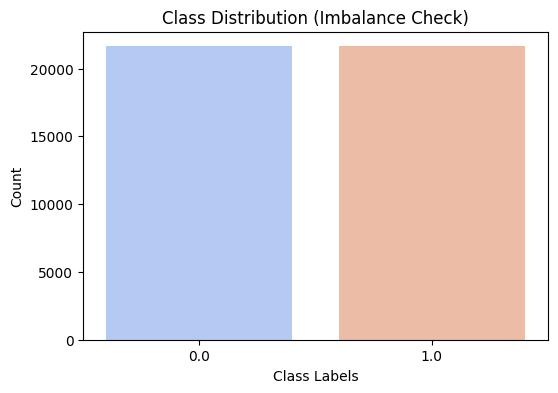

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Define the target column
target_column = "Result"

# Count occurrences of each class
class_counts = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance Check)")
plt.show()


In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload and Load Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Define Columns for Outlier Detection (Exclude Categorical)
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Exclude categorical variables
outlier_columns = [col for col in numerical_columns if col not in ["Gender", "Result"]]

# Step 3: Detect Outliers Using Z-Score
z_threshold = 3  # Standard threshold
z_scores = np.abs(zscore(df[outlier_columns]))
outliers_z = (z_scores > z_threshold).sum()

# Step 4: Detect Outliers Using IQR
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).sum()

# Step 5: Calculate Outlier Percentage
total_rows = len(df)
total_outliers = outliers_z.sum()
outlier_percentage = (total_outliers / total_rows) * 100

# Step 6: Print Outlier Analysis
print("\n🔍 Outlier Analysis:")
print(f"📌 Total Rows in Dataset: {total_rows}")
print(f"📌 Total Outliers Detected (Z-Score): {total_outliers}")
print(f"📌 Outlier Percentage: {outlier_percentage:.2f}%")

# Step 7: Decide Outlier Handling Strategy
if outlier_percentage < 5:
    print("✅ Outlier percentage is low (<5%). Keeping them for model training.")
elif outlier_percentage < 15:
    print("🔄 Moderate outliers detected (5-15%). Applying KNN Imputation.")
elif outlier_percentage > 15:
    print("⚠️ High outlier percentage (>15%). Applying Log Transformation and KNN Imputation.")

# Step 8: Apply KNN Imputation (Replacing Outliers Instead of Removal)
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[outlier_columns] = imputer.fit_transform(df[outlier_columns])

# Step 9: Apply Log Transformation to Skewed Features
log_transform_columns = ["Total Bilirubin", "Direct Bilirubin", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Alkphos Alkaline Phosphotase"]
for col in log_transform_columns:
    if col in df.columns:
        df_imputed[col] = np.log1p(df_imputed[col])

# Step 10: Save Processed Dataset
df_imputed.to_csv(") over fitting preprossing.csv", index=False)
print("\n✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.")


📂 Please upload your dataset...


Saving finaldataset.csv to finaldataset (3).csv

🔍 Outlier Analysis:
📌 Total Rows in Dataset: 43278
📌 Total Outliers Detected (Z-Score): 174
📌 Outlier Percentage: 0.40%
✅ Outlier percentage is low (<5%). Keeping them for model training.

✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.


📂 Please upload your dataset...


Saving Processed_Dataset_Removed_Outliers (1).csv to Processed_Dataset_Removed_Outliers (1) (1).csv

📊 **Outlier Handling Report:**
🔹 Total Rows: 34626
🔹 Outliers Detected: 5943
🔹 Outlier Percentage: 17.16%

✅ Outliers Removed. New dataset has 28683 rows (Reduced from 34626).
✅ Winsorization Applied: Extreme values adjusted with minimal variation to prevent duplicates.
✅ Log Transformation Applied: Outliers impact reduced without removal.

📊 **Box Plot Before Handling Outliers:**


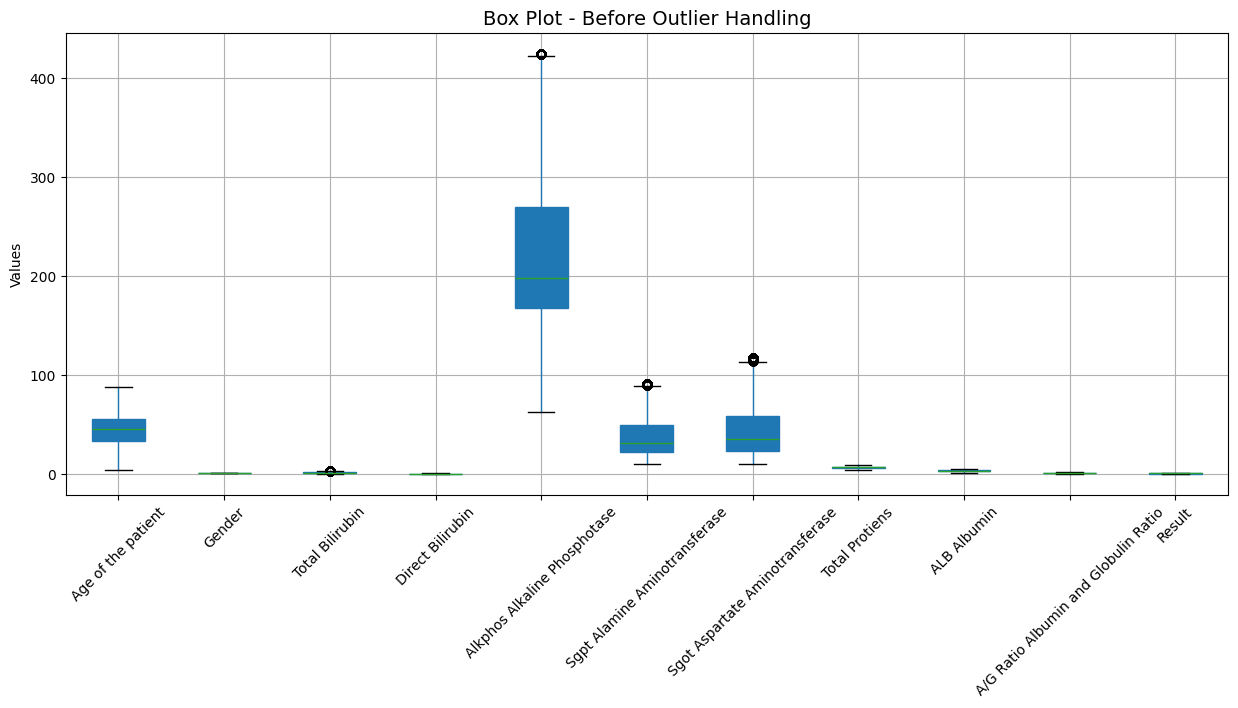


📊 **Box Plot After Removing Outliers:**


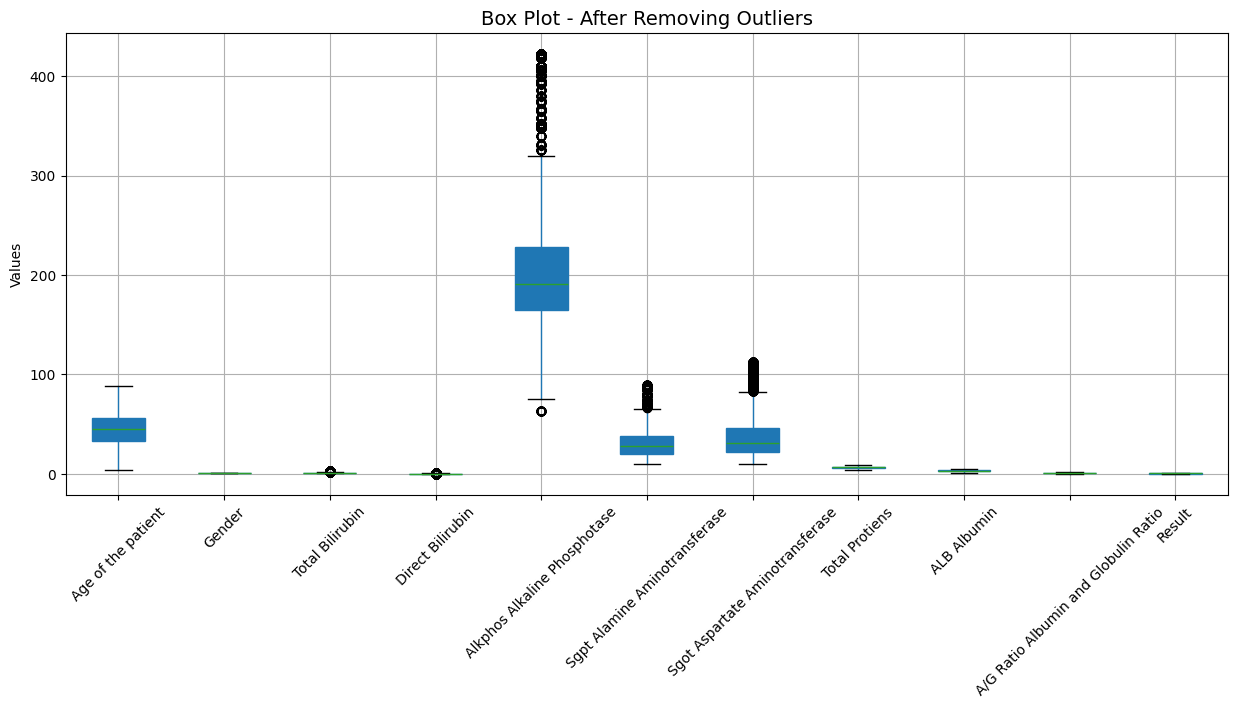


📊 **Box Plot After Winsorization:**


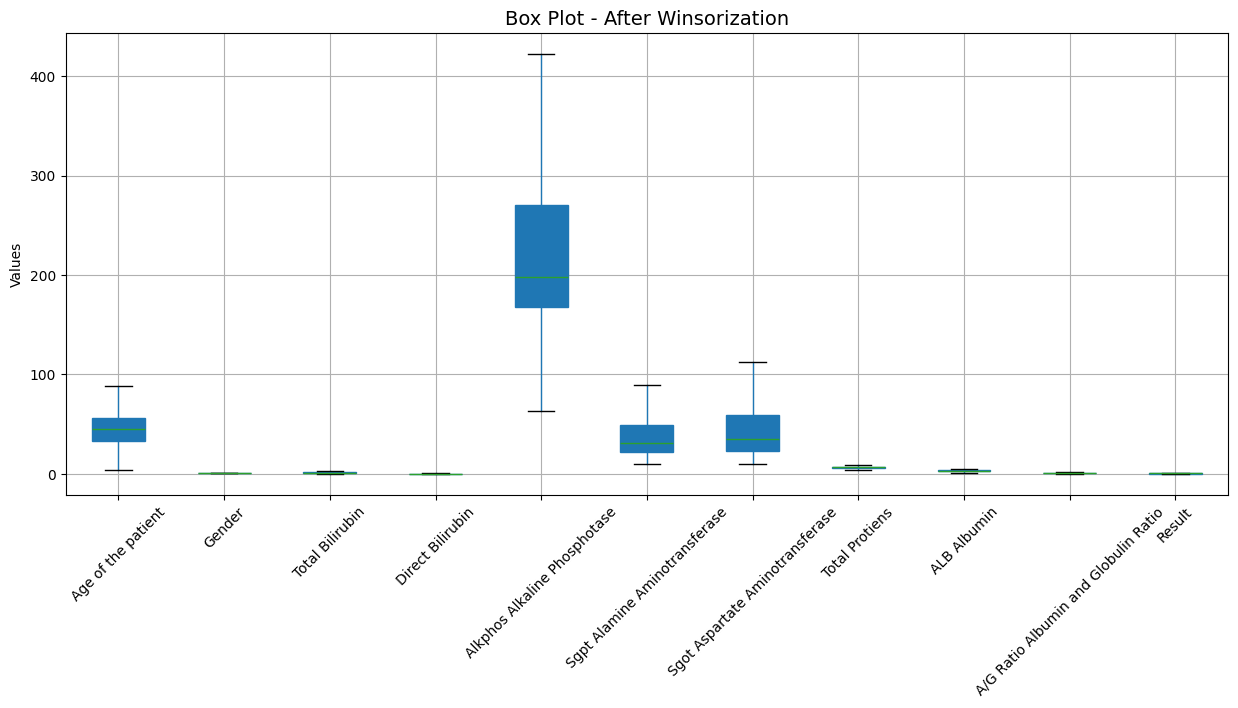


📊 **Box Plot After Log Transformation:**


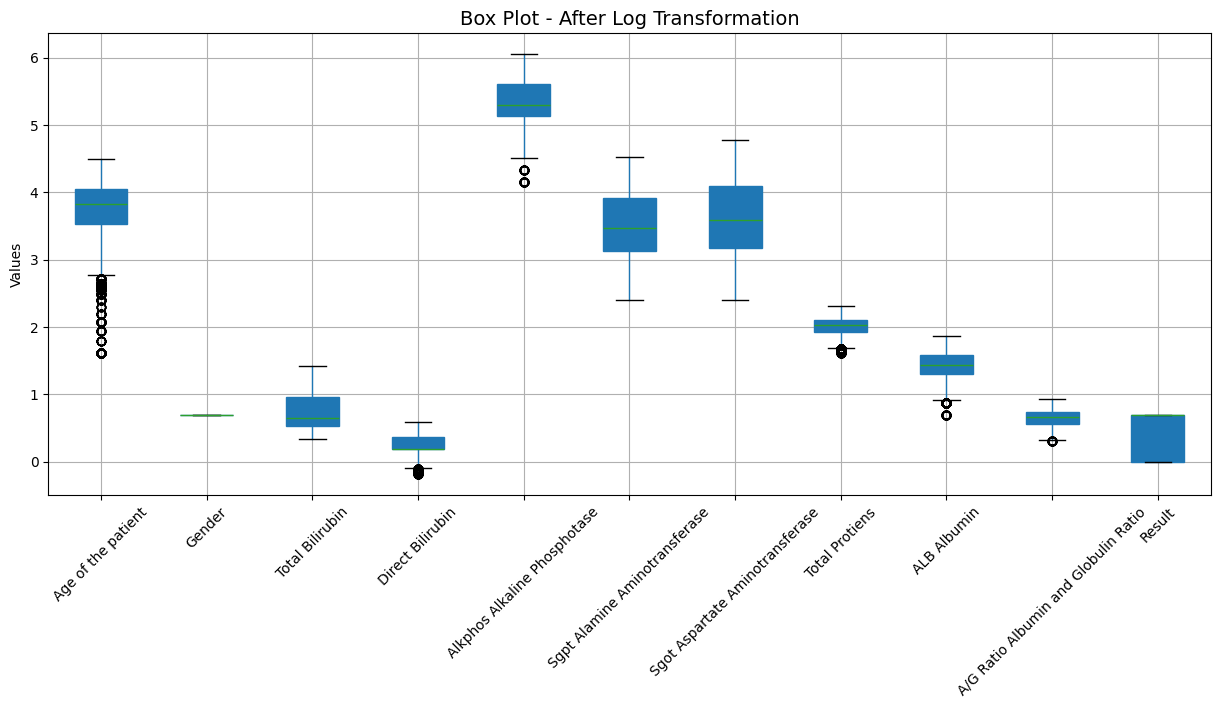


✅ **Select Outlier Handling Method:**
1️⃣ Remove Outliers (Deletes Rows)
2️⃣ Winsorization (Replaces Outliers)
3️⃣ Log Transformation (Reduces Outlier Impact)
Enter 1, 2, or 3: 2

📌 **Final Dataset: Winsorization Applied**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Processed dataset saved and ready for download: **Processed_Dataset_Winsorized.csv**


In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas numpy matplotlib seaborn scipy

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import zscore

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define Outlier Detection Methods
def detect_outliers_iqr(data):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_index.update(outliers.index)
    return list(outliers_index)

def detect_outliers_zscore(data, threshold=3):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        z_scores = np.abs(zscore(data[column]))
        outliers = data[z_scores > threshold]
        outliers_index.update(outliers.index)
    return list(outliers_index)

# Detect Outliers using Both Methods
outliers_iqr = detect_outliers_iqr(df)
outliers_zscore = detect_outliers_zscore(df)

# Combine Unique Outlier Indices
outliers_combined = list(set(outliers_iqr + outliers_zscore))
total_rows = len(df)
outlier_percentage = (len(outliers_combined) / total_rows) * 100

print(f"\n📊 **Outlier Handling Report:**")
print(f"🔹 Total Rows: {total_rows}")
print(f"🔹 Outliers Detected: {len(outliers_combined)}")
print(f"🔹 Outlier Percentage: {outlier_percentage:.2f}%\n")

# ===================== OPTION 1: REMOVE OUTLIERS ===================== #
df_removed = df.drop(index=outliers_combined)
print(f"✅ Outliers Removed. New dataset has {len(df_removed)} rows (Reduced from {total_rows}).")

# ===================== OPTION 2: WINSORIZATION (WITH RANDOM VARIATION) ===================== #
def winsorize_data(data):
    df_winsorized = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Define noise factor as an integer within a reasonable range
        noise_factor = max(1, int(0.05 * IQR))  # Ensure at least 1 for non-decimal variation

        # Apply Winsorization with integer noise
        df_winsorized[column] = np.where(data[column] < lower_bound,
                                         lower_bound + np.random.randint(1, noise_factor + 1, len(data)),
                                         data[column])
        df_winsorized[column] = np.where(data[column] > upper_bound,
                                         upper_bound - np.random.randint(1, noise_factor + 1, len(data)),
                                         df_winsorized[column])

    return df_winsorized

df_winsorized = winsorize_data(df)
print(f"✅ Winsorization Applied: Extreme values adjusted with minimal variation to prevent duplicates.")

# ===================== OPTION 3: LOG TRANSFORMATION ===================== #
def log_transform_data(data):
    df_log = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        df_log[column] = np.log1p(df_log[column])  # log1p avoids log(0) errors
    return df_log

df_log_transformed = log_transform_data(df)
print(f"✅ Log Transformation Applied: Outliers impact reduced without removal.")

# ===================== OPTION 4: VISUALIZE HANDLED DATA ===================== #
def plot_boxplots(data, title):
    numeric_cols = data.select_dtypes(include=['number']).columns
    plt.figure(figsize=(15, 6))
    data[numeric_cols].boxplot(rot=45, grid=True, patch_artist=True, showfliers=True)
    plt.title(title, fontsize=14)
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.show()

# Original vs Processed Data Visualization
print("\n📊 **Box Plot Before Handling Outliers:**")
plot_boxplots(df, "Box Plot - Before Outlier Handling")

print("\n📊 **Box Plot After Removing Outliers:**")
plot_boxplots(df_removed, "Box Plot - After Removing Outliers")

print("\n📊 **Box Plot After Winsorization:**")
plot_boxplots(df_winsorized, "Box Plot - After Winsorization")

print("\n📊 **Box Plot After Log Transformation:**")
plot_boxplots(df_log_transformed, "Box Plot - After Log Transformation")

# ===================== FINAL CHOICE ===================== #
print("\n✅ **Select Outlier Handling Method:**")
print("1️⃣ Remove Outliers (Deletes Rows)")
print("2️⃣ Winsorization (Replaces Outliers)")
print("3️⃣ Log Transformation (Reduces Outlier Impact)")
choice = input("Enter 1, 2, or 3: ")

if choice == "1":
    df_final = df_removed
    print("\n📌 **Final Dataset: Outliers Removed**")
    file_name = "Processed_Dataset_Removed_Outliers.csv"
elif choice == "2":
    df_final = df_winsorized
    print("\n📌 **Final Dataset: Winsorization Applied**")
    file_name = "Processed_Dataset_Winsorized.csv"
elif choice == "3":
    df_final = df_log_transformed
    print("\n📌 **Final Dataset: Log Transformation Applied**")
    file_name = "Processed_Dataset_Log_Transformed.csv"
else:
    df_final = df
    file_name = "Processed_Dataset_Original.csv"
    print("\n⚠ Invalid choice. Using original dataset.")

# ===================== SAVE & DOWNLOAD FINAL DATASET ===================== #
df_final.to_csv(file_name, index=False)
files.download(file_name)
print(f"\n✅ Processed dataset saved and ready for download: **{file_name}**")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
# Step 1: Upload and Load Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define features and target
X = df.drop(columns=["Result"])  # Exclude target variable
y = df["Result"]  # Target variable

# Step 1: Train-Test Split (Ensuring Feature Scaling & Selection are only on training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Define Cross-Validation Strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Create a Pipeline to Prevent Data Leakage
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=5)),  # Feature Selection
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Model Training
])

# Step 4: Perform Cross-Validation on Training Data
cv_scores = []
for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    pipeline.fit(X_train_fold, y_train_fold)  # Train only on training fold
    y_pred = pipeline.predict(X_val_fold)  # Predict on validation fold

    accuracy = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(accuracy)

# Step 5: Train on Full Training Data and Evaluate on Test Data
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 6: Display Results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy (Ensuring No Data Leakage): {test_accuracy:.4f}")


📂 Please upload your dataset...


Saving finaldataset.csv to finaldataset (2).csv
Cross-Validation Accuracy Scores: [0.9955234657039711, 0.9972563176895307, 0.9961005199306759, 0.9968226458694396, 0.9962449451184286]
Mean Cross-Validation Accuracy: 0.9964
Test Accuracy (Ensuring No Data Leakage): 0.9957


In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Exclude Categorical Variables (Gender, Result)
categorical_features = ["Gender", "Result"]
numeric_features = [col for col in df.columns if col not in categorical_features]

# Step 3: Apply Log Transformation to Highly Skewed Features
log_transform_features = ["Total Bilirubin", "Direct Bilirubin", "Alkaline Phosphatase", "SGPT", "SGOT"]

for feature in log_transform_features:
    if feature in numeric_features:
        df[feature] = np.log1p(df[feature])  # log1p to avoid log(0) issue

# Step 4: Detect Outliers using Z-Score & IQR
z_threshold = 3  # Standard threshold for Z-score method
iqr_threshold = 1.5  # Standard threshold for IQR method

outlier_counts = {}

for column in numeric_features:
    z_scores = np.abs(zscore(df[column]))
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    iqr_lower = df[column].quantile(0.25) - (iqr_threshold * iqr)
    iqr_upper = df[column].quantile(0.75) + (iqr_threshold * iqr)

    outlier_counts[column] = {
        "Outliers (Z-Score)": (z_scores > z_threshold).sum(),
        "Outliers (IQR)": ((df[column] < iqr_lower) | (df[column] > iqr_upper)).sum()
    }

# Convert to DataFrame and Display
outlier_df = pd.DataFrame(outlier_counts).T
print("\n📊 Outlier Report:")
print(outlier_df)

# Step 5: Replace Outliers using KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[numeric_features] = knn_imputer.fit_transform(df[numeric_features])

# Step 6: Save the Processed Dataset
processed_file_name = "Processed_Dataset.csv"
df_imputed.to_csv(processed_file_name, index=False)
print("\n✅ Processed dataset saved successfully!")

# Step 7: Download Processed File



📂 Please upload your dataset...


Saving finaldataset.csv to finaldataset.csv

📊 Outlier Report:
                                      Outliers (Z-Score)  Outliers (IQR)
Age of the patient                                     0               0
Total Bilirubin                                        0               0
Direct Bilirubin                                     133             362
Alkphos Alkaline Phosphotase                           0               0
Sgpt Alamine Aminotransferase                          0               0
Sgot Aspartate Aminotransferase                        0               0
Total Protiens                                         0               0
ALB Albumin                                            0               0
A/G Ratio Albumin and Globulin Ratio                   0               0

✅ Processed dataset saved successfully!


In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas numpy scipy

# Import Libraries
import numpy as np
import pandas as pd
from google.colab import files
from scipy.stats import iqr

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Winsorization Function for Direct Bilirubin
def winsorize_direct_bilirubin(data):
    df_winsorized = data.copy()
    column = "Direct Bilirubin"  # Target column

    # Compute IQR for Direct Bilirubin
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add noise dynamically within a small range
    noise_factor = max(1, int(0.05 * IQR))  # Ensuring small variations

    # Winsorize with variation
    df_winsorized[column] = np.where(
        data[column] < lower_bound,
        lower_bound + np.random.uniform(0.1, noise_factor, len(data)),
        data[column]
    )
    df_winsorized[column] = np.where(
        data[column] > upper_bound,
        upper_bound - np.random.uniform(0.1, noise_factor, len(data)),
        df_winsorized[column]
    )

    return df_winsorized

# Apply Winsorization to Direct Bilirubin
df_winsorized = winsorize_direct_bilirubin(df)

# Save and Download Processed Dataset
file_name = "Processed_Dataset_Direct_Bilirubin_Winsorized.csv"
df_winsorized.to_csv(file_name, index=False)
files.download(file_name)

print(f"\n✅ Winsorization applied to 'Direct Bilirubin'. Processed dataset saved as **{file_name}**.")


📂 Please upload your dataset...


Saving Processed_Dataset_Direct_Bilirubin_Winsorized (2).csv to Processed_Dataset_Direct_Bilirubin_Winsorized (2) (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Winsorization applied to 'Direct Bilirubin'. Processed dataset saved as **Processed_Dataset_Direct_Bilirubin_Winsorized.csv**.


In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas numpy scipy

# Import Libraries
import numpy as np
import pandas as pd
from google.colab import files
from scipy.stats import iqr

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Winsorization Function for Direct Bilirubin
def improved_winsorization(data, column, iqr_factor=1.5, noise_percentage=0.05):
    """
    Applies Winsorization to the specified column using IQR method with noise addition.

    Parameters:
    - data (DataFrame): The dataset containing the column.
    - column (str): The name of the column to be winsorized.
    - iqr_factor (float): Factor to define outlier bounds based on IQR.
    - noise_percentage (float): Percentage of IQR used for adding small noise.

    Returns:
    - DataFrame: The dataset with the column winsorized.
    """
    df_winsorized = data.copy()

    # Compute IQR
    Q1 = df_winsorized[column].quantile(0.25)
    Q3 = df_winsorized[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Noise addition range
    noise_range = noise_percentage * IQR  # Small dynamic noise
    if noise_range == 0:
        noise_range = 0.01  # Ensure non-zero adjustment

    # Winsorize with variation
    df_winsorized[column] = np.where(
        df_winsorized[column] < lower_bound,
        lower_bound + np.random.uniform(0, noise_range, df_winsorized.shape[0]),
        df_winsorized[column]
    )
    df_winsorized[column] = np.where(
        df_winsorized[column] > upper_bound,
        upper_bound - np.random.uniform(0, noise_range, df_winsorized.shape[0]),
        df_winsorized[column]
    )

    return df_winsorized

# Apply Winsorization to Direct Bilirubin
df_winsorized = improved_winsorization(df, "Direct Bilirubin")

# Save and Download Processed Dataset
file_name = "Processed_Dataset_Direct_Bilirubin_Winsorized.csv"
df_winsorized.to_csv(file_name, index=False)
files.download(file_name)

print(f"\n✅ Winsorization applied to 'Direct Bilirubin'. Processed dataset saved as **{file_name}**.")


📂 Please upload your dataset...


Saving Processed_Dataset_Direct_Bilirubin_Winsorized (3).csv to Processed_Dataset_Direct_Bilirubin_Winsorized (3) (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Winsorization applied to 'Direct Bilirubin'. Processed dataset saved as **Processed_Dataset_Direct_Bilirubin_Winsorized.csv**.


📂 Please upload your dataset...


Saving Processed_Dataset_Direct_Bilirubin_Winsorized (4).csv to Processed_Dataset_Direct_Bilirubin_Winsorized (4) (1).csv

📊 **Outlier Handling Report:**
🔹 Total Rows: 43278
🔹 Outliers Detected: 8652
🔹 Outlier Percentage: 19.99%

✅ Outliers Removed. New dataset has 34626 rows (Reduced from 43278).
✅ Winsorization Applied: Extreme values replaced with nearest valid boundary.
✅ Log Transformation Applied: Outliers impact reduced without removal.

📊 **Box Plot Before Handling Outliers:**


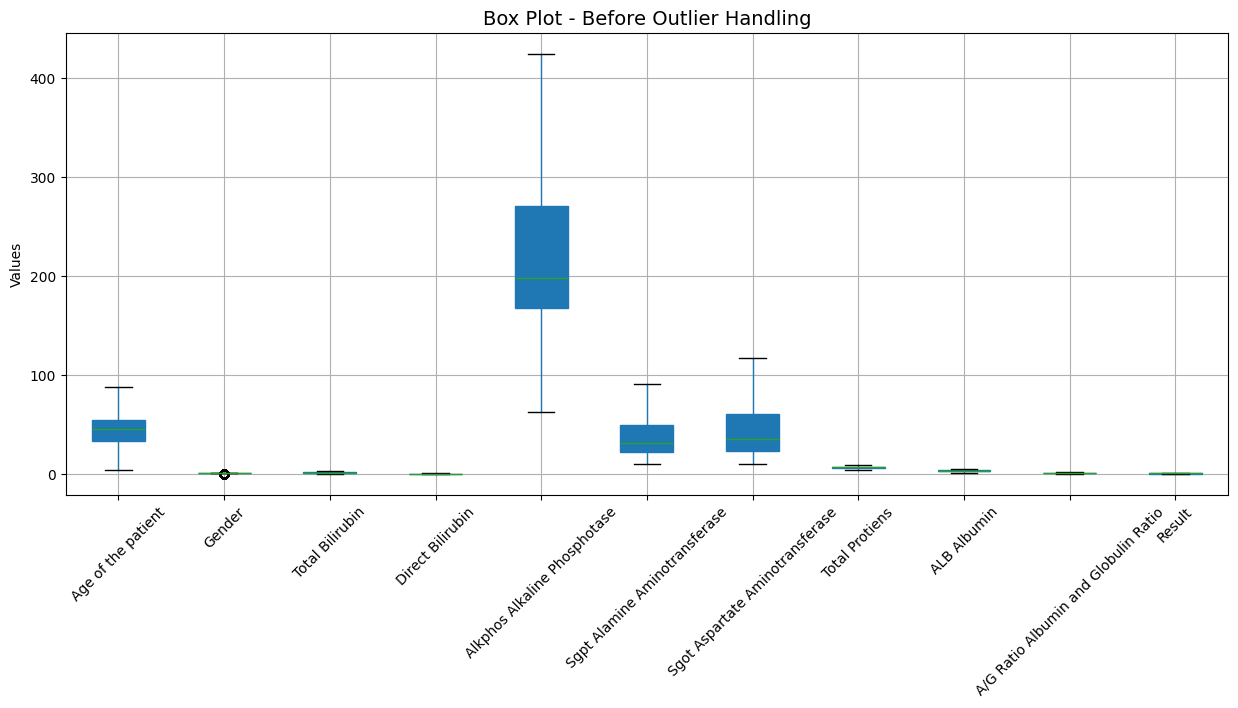


📊 **Box Plot After Removing Outliers:**


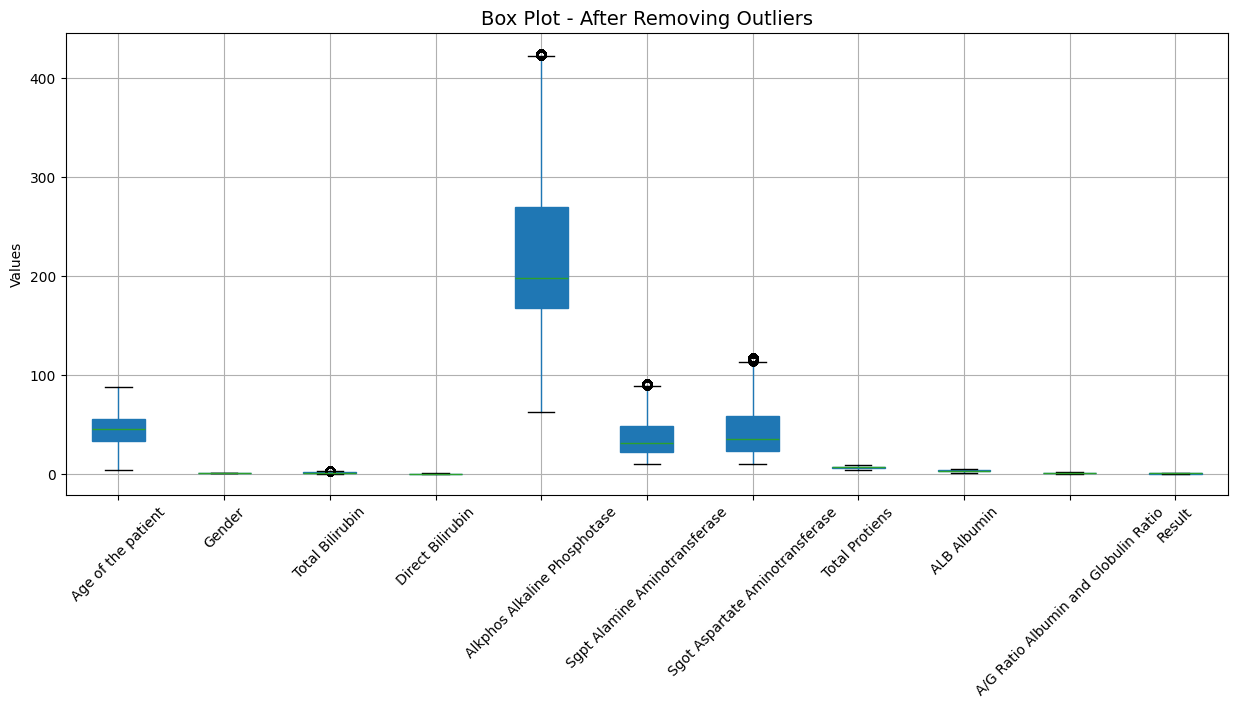


📊 **Box Plot After Winsorization:**


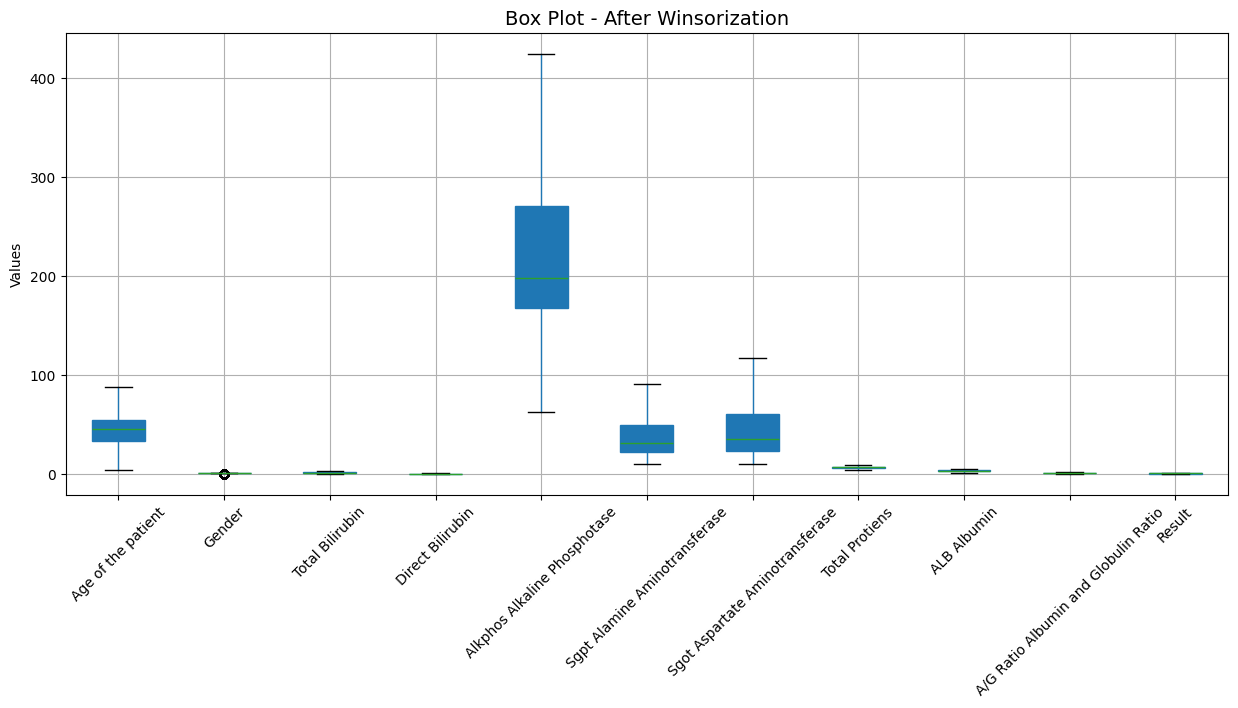


📊 **Box Plot After Log Transformation:**


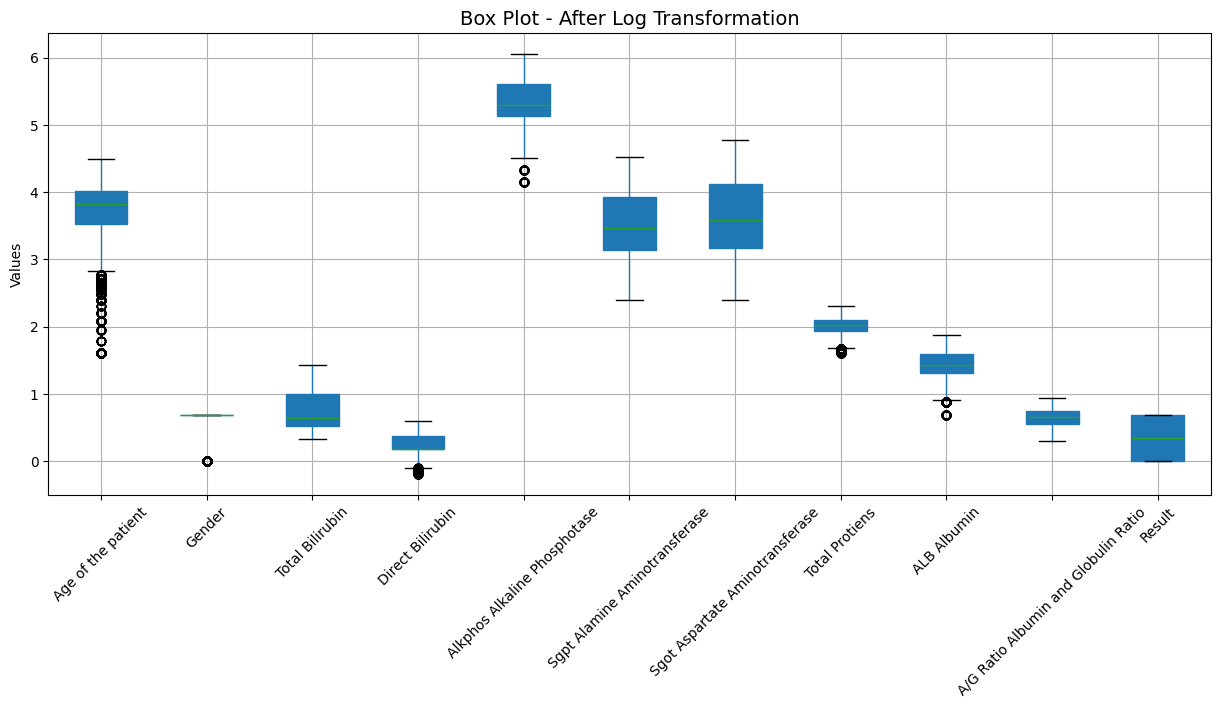


✅ **Select Outlier Handling Method:**
1️⃣ Remove Outliers (Deletes Rows)
2️⃣ Winsorization (Replaces Outliers)
3️⃣ Log Transformation (Reduces Outlier Impact)
Enter 1, 2, or 3: 2

📌 **Final Dataset: Winsorization Applied**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Processed dataset saved and ready for download: **Processed_Dataset_Winsorized.csv**


In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas numpy matplotlib seaborn scipy

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import zscore

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define Outlier Detection Methods
def detect_outliers_iqr(data):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_index.update(outliers.index)
    return list(outliers_index)

def detect_outliers_zscore(data, threshold=3):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        z_scores = np.abs(zscore(data[column]))
        outliers = data[z_scores > threshold]
        outliers_index.update(outliers.index)
    return list(outliers_index)

# Detect Outliers using Both Methods
outliers_iqr = detect_outliers_iqr(df)
outliers_zscore = detect_outliers_zscore(df)

# Combine Unique Outlier Indices
outliers_combined = list(set(outliers_iqr + outliers_zscore))
total_rows = len(df)
outlier_percentage = (len(outliers_combined) / total_rows) * 100

print(f"\n📊 **Outlier Handling Report:**")
print(f"🔹 Total Rows: {total_rows}")
print(f"🔹 Outliers Detected: {len(outliers_combined)}")
print(f"🔹 Outlier Percentage: {outlier_percentage:.2f}%\n")

# ===================== OPTION 1: REMOVE OUTLIERS ===================== #
df_removed = df.drop(index=outliers_combined)
print(f"✅ Outliers Removed. New dataset has {len(df_removed)} rows (Reduced from {total_rows}).")

# ===================== OPTION 2: WINSORIZATION ===================== #
def winsorize_data(data):
    df_winsorized = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_winsorized[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        df_winsorized[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return df_winsorized

df_winsorized = winsorize_data(df)
print(f"✅ Winsorization Applied: Extreme values replaced with nearest valid boundary.")

# ===================== OPTION 3: LOG TRANSFORMATION ===================== #
def log_transform_data(data):
    df_log = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        df_log[column] = np.log1p(df_log[column])  # log1p avoids log(0) errors
    return df_log

df_log_transformed = log_transform_data(df)
print(f"✅ Log Transformation Applied: Outliers impact reduced without removal.")

# ===================== OPTION 4: VISUALIZE HANDLED DATA ===================== #
def plot_boxplots(data, title):
    numeric_cols = data.select_dtypes(include=['number']).columns
    plt.figure(figsize=(15, 6))
    data[numeric_cols].boxplot(rot=45, grid=True, patch_artist=True, showfliers=True)
    plt.title(title, fontsize=14)
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.show()

# Original vs Processed Data Visualization
print("\n📊 **Box Plot Before Handling Outliers:**")
plot_boxplots(df, "Box Plot - Before Outlier Handling")

print("\n📊 **Box Plot After Removing Outliers:**")
plot_boxplots(df_removed, "Box Plot - After Removing Outliers")

print("\n📊 **Box Plot After Winsorization:**")
plot_boxplots(df_winsorized, "Box Plot - After Winsorization")

print("\n📊 **Box Plot After Log Transformation:**")
plot_boxplots(df_log_transformed, "Box Plot - After Log Transformation")

# ===================== FINAL CHOICE ===================== #
print("\n✅ **Select Outlier Handling Method:**")
print("1️⃣ Remove Outliers (Deletes Rows)")
print("2️⃣ Winsorization (Replaces Outliers)")
print("3️⃣ Log Transformation (Reduces Outlier Impact)")
choice = input("Enter 1, 2, or 3: ")

if choice == "1":
    df_final = df_removed
    print("\n📌 **Final Dataset: Outliers Removed**")
    file_name = "Processed_Dataset_Removed_Outliers.csv"
elif choice == "2":
    df_final = df_winsorized
    print("\n📌 **Final Dataset: Winsorization Applied**")
    file_name = "Processed_Dataset_Winsorized.csv"
elif choice == "3":
    df_final = df_log_transformed
    print("\n📌 **Final Dataset: Log Transformation Applied**")
    file_name = "Processed_Dataset_Log_Transformed.csv"
else:
    df_final = df
    file_name = "Processed_Dataset_Original.csv"
    print("\n⚠ Invalid choice. Using original dataset.")

# ===================== SAVE & DOWNLOAD FINAL DATASET ===================== #
df_final.to_csv(file_name, index=False)
files.download(file_name)
print(f"\n✅ Processed dataset saved and ready for download: **{file_name}**")
